In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\train.csv")

In [3]:
print(data_train.head())

   id  annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0   0       29367.99                 0.084           736      2528.42   
1   1       22108.02                 0.166           636      4593.10   
2   2       49566.20                 0.097           694     17005.15   
3   3       46858.25                 0.065           533      4682.48   
4   4       25496.70                 0.053           665     12184.43   

   interest_rate  gender marital_status education_level employment_status  \
0          13.67  Female         Single     High School     Self-employed   
1          12.92    Male        Married        Master's          Employed   
2           9.76    Male         Single     High School          Employed   
3          16.10  Female         Single     High School          Employed   
4          10.21    Male        Married     High School          Employed   

         loan_purpose grade_subgrade  loan_paid_back  
0               Other             C3       

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
data_train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [6]:
print(data_train.isnull().sum())

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


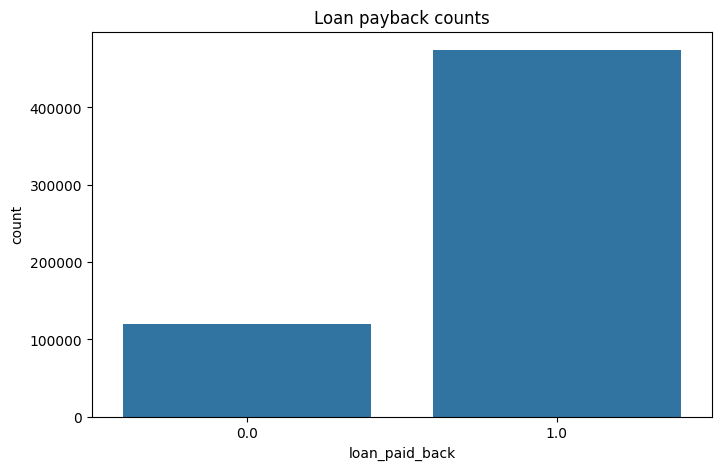

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan_paid_back',data=data_train)
plt.title('Loan payback counts')
plt.show()

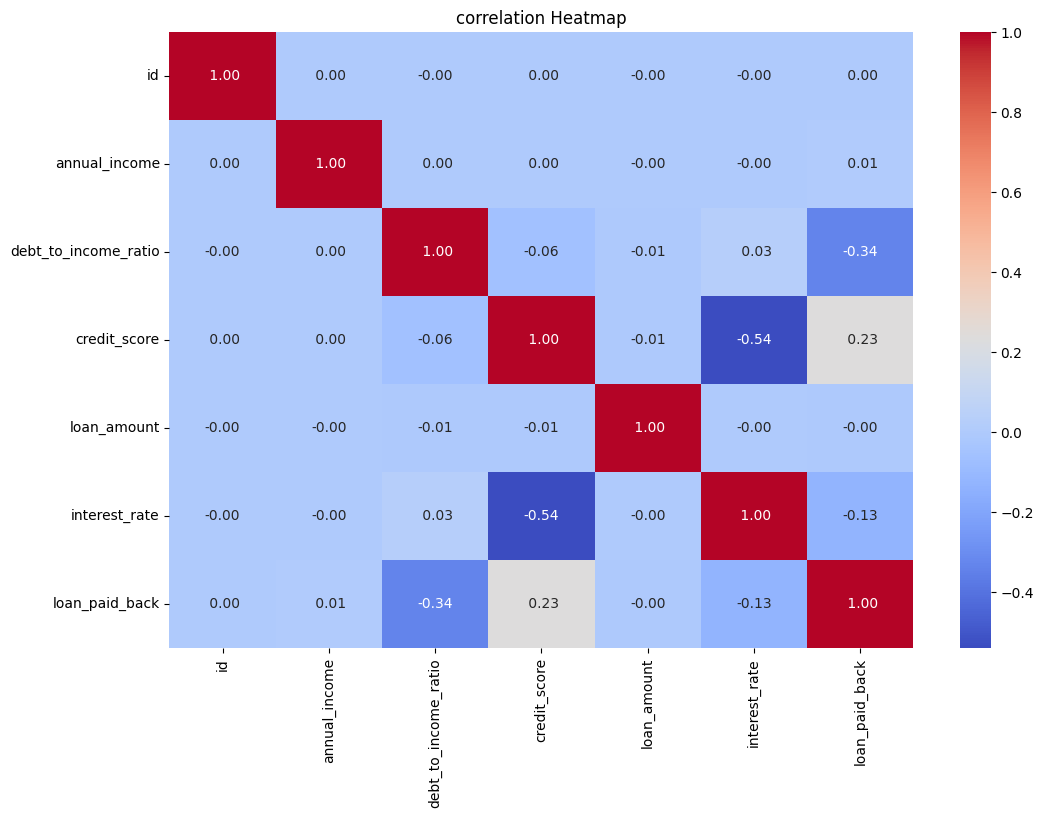

In [8]:
numeric_data = data_train.select_dtypes(include=[float,int])
plt.figure(figsize=(12,8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt=' .2f' , cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [9]:
data = pd.get_dummies(data_train,drop_first=True)
x = data.drop('loan_paid_back' , axis=1)
y = data['loan_paid_back']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
model = RandomForestClassifier(n_estimators=80, random_state=20)

In [14]:
model.fit(X_train, y_train)

,n_estimators,80
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred=model.predict(X_test)

In [20]:
print('Accuracy:' , accuracy_score(Y_test,y_pred))
print('Classification Report: \n' , classification_report(Y_test, y_pred))
print('Confusion Matrix: \n' , confusion_matrix(Y_test, y_pred))

Accuracy: 0.9013964764013165
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.59      0.71     23997
         1.0       0.90      0.98      0.94     94802

    accuracy                           0.90    118799
   macro avg       0.89      0.79      0.82    118799
weighted avg       0.90      0.90      0.89    118799

Confusion Matrix: 
 [[14238  9759]
 [ 1955 92847]]


In [21]:
test_data = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\test.csv")

In [22]:
test_data = pd.get_dummies(test_data,drop_first=True)
y_pred = model.predict(test_data)

In [23]:
submission = pd.DataFrame({'id' : test_data['id'], 'loan_paid_back' : y_pred})
submission.to_csv('submission.csv' , index = False)

In [24]:
submission.head()

,id,loan_paid_back
0,593994,1.0
1,593995,1.0
2,593996,1.0
3,593997,1.0
4,593998,1.0
